In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%xmode plain

Exception reporting mode: Plain


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import xraymaterials

# Quick Start

Calculate $\delta$, $\beta$ and $\mu$ for compounds or ICRU-44 materials.  We need the decomposition of the material into constituent elements and either the number density or mass density of each element.  `xraymaterials` calculates number densities for elements in compounds, and mass densities for elements in mixtures such as ICRU-44 materials.

The complex refractive index and absorption coefficient (including photoelectric effect) are returned all together from `calculate_n_mu`, which accepts a list of elements/atomic numbers and a list of number densities or mass densities.

The two figures below demonstrate how to obtain $\delta$, $\beta$ and $\mu$ for water using either the chemical formula or the ICRU-44 decomposition.

Text(0.5,1,'Water from formula')

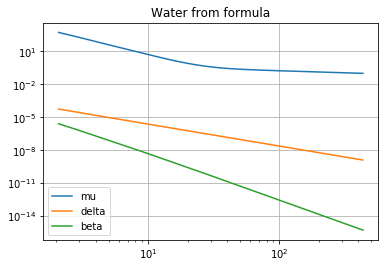

In [13]:
symbols, elem_n_cc = xraymaterials.compound_number_densities("H2O", 0.997)
delta, beta, mu, energy_keV = xraymaterials.calculate_n_mu(symbols, elem_n_cc=elem_n_cc)

plt.loglog(energy_keV, mu, '-', label='mu')
plt.loglog(energy_keV, delta, '-', label='delta')
plt.loglog(energy_keV, beta, '-', label='beta')
plt.grid()
plt.legend(loc='best')
plt.title("Water from formula")

Text(0.5,1,'ICRU water')

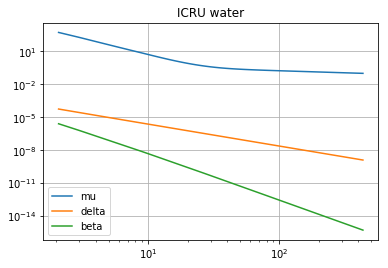

In [14]:
wawa = xraymaterials.load_icru44_composition("Water, Liquid")
elem_g_cc = wawa["density_g_cc"] * np.array(wawa["fraction"])
delta, beta, mu, energy_keV = xraymaterials.calculate_n_mu(wawa["z"], elem_g_cc=elem_g_cc)

plt.loglog(energy_keV, mu, label='mu')
plt.loglog(energy_keV, delta, label='delta')
plt.loglog(energy_keV, beta, label='beta')
plt.grid()
plt.legend()
plt.title("ICRU water")

# List ICRU-44 materials

`list_icru44` returns all the valid ICRU-44 material names.  These materials' properties can be loaded using `load_icru44_composition` and `load_icru_absorption`.

In [8]:
xraymaterials.list_icru44()

['15 mmol L-1 Ceric Ammonium Sulfate Solution',
 'A-150 Tissue-Equivalent Plastic',
 'Adipose Tissue',
 'Air, Dry',
 'Alanine',
 'B-100 Bone-Equivalent Plastic',
 'Bakelite',
 'Blood, Whole',
 'Bone, Cortical',
 'Brain, Grey-White Matter',
 'Breast Tissue',
 'C-552 Air-equivalent Plastic',
 'Cadmium Telluride',
 'Calcium Fluoride',
 'Calcium Sulfate',
 'Cesium Iodide',
 'Concrete, Barite',
 'Concrete, Ordinary',
 'Eye Lens',
 'Ferrous Sulfate, Standard Fricke',
 'Gadolinium Oxysulfide',
 'Gafchromic Sensor',
 'Gallium Arsenide',
 'Glass, Borosilicate "Pyrex"',
 'Glass, Lead',
 'Lithium Fluoride',
 'Lithium Tetraborate',
 'Lung Tissue',
 'Magnesium Tetraborate',
 'Mercuric Iodide',
 'Muscle, Skeletal',
 'Ovary',
 'Photographic Emulsion, Kodak Type AA',
 'Photographic Emulsion, Standard Nuclear',
 'Plastic Scintillator, Vinyltoluene',
 'Polyethylene Terephthalate, "Mylar"',
 'Polyethylene',
 'Polymethyl Methacrylate',
 'Polystyrene',
 'Polytetrafluoroethylene, "Teflon"',
 'Polyvinyl Chlo

In [9]:
xraymaterials.load_icru44_absorption('Glass, Lead')

,energy_MeV,mu_rho_cm2_g,muen_rho_cm2_g
0,0.001000,4816.00000,4804.00000
1,0.001150,3619.00000,3607.00000
2,0.001323,2704.00000,2693.00000
3,0.001323,2713.00000,2702.00000
4,0.001341,2639.00000,2628.00000
5,0.001359,2567.00000,2556.00000
6,0.001359,2571.00000,2560.00000
7,0.001500,2088.00000,2078.00000
8,0.001527,2012.00000,2002.00000
9,0.001527,2014.00000,2004.00000


In [10]:
xraymaterials.load_icru44_composition('Glass, Lead')

{'density_g_cc': 6.22,
 'fraction': [0.156453, 0.080866, 0.008092, 0.002651, 0.751938],
 'material': 'Glass, Lead',
 'z': [8, 14, 22, 33, 82]}

# List elements

Spectral properties of elements through Uranium are all available.

In [11]:
xraymaterials.list_elements()

['Ac',
 'Ag',
 'Al',
 'Ar',
 'As',
 'At',
 'Au',
 'B',
 'Ba',
 'Be',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Cl',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Fr',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'He',
 'Hf',
 'Hg',
 'Ho',
 'I',
 'In',
 'Ir',
 'K',
 'Kr',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Na',
 'Nb',
 'Nd',
 'Ne',
 'Ni',
 'O',
 'Os',
 'P',
 'Pa',
 'Pb',
 'Pd',
 'Pm',
 'Po',
 'Pr',
 'Pt',
 'Ra',
 'Rb',
 'Re',
 'Rh',
 'Rn',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Tc',
 'Te',
 'Th',
 'Ti',
 'Tl',
 'Tm',
 'U',
 'V',
 'W',
 'Xe',
 'Y',
 'Yb',
 'Zn',
 'Zr']

In [12]:
xraymaterials.load_element('Rh')

,energy_keV,f1_e_atom,f2_e_atom,mu_rho_cm2_g,sigma_rho_cm2_g,mu_rho_tot_cm2_g,mu_rho_K_cm2_g,lambda_nm
0,2.080733,38.6746,5.217300,1025.300000,6.689100,1032.00000,0.00000,0.595900
1,2.224304,38.2656,4.736700,870.810000,6.608900,877.42000,0.00000,0.557400
2,2.377781,37.7071,4.305800,740.490000,6.511200,747.00000,0.00000,0.521400
3,2.541848,36.9090,3.918000,630.320000,6.396800,636.72000,0.00000,0.487800
4,2.717235,35.6223,3.565700,536.610000,6.267100,542.88000,0.00000,0.456300
5,2.904724,32.7378,3.248800,457.360000,6.123200,463.48000,0.00000,0.426800
6,2.943724,31.4079,3.189300,443.040000,6.092900,449.13000,0.00000,0.421200
7,2.988781,27.8447,3.123100,427.300000,6.057700,433.36000,0.00000,0.414800
8,3.000796,23.8203,3.105600,423.200000,6.048300,429.25000,0.00000,0.413200
9,3.018819,27.6279,10.824000,1466.200000,6.034200,1472.20000,0.00000,0.410700
